In [1]:
import pandas as pd
import numpy as np

# Import clean data (This dataset was hosted on IBM Cloud Object)
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'
df = pd.read_csv(path)

In [2]:
df.to_csv('module_5_auto.csv')

In [3]:
df=df._get_numeric_data()
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [13]:
# Plotting libraries
%%capture
! pip install ipywidgets

SyntaxError: invalid syntax (<ipython-input-13-93e1860e3437>, line 2)

In [5]:
from ipywidgets import interact, interactive, fixed, interact_manual

In [7]:
# Functions for Plotting
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [8]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

In [9]:
# PART 1:  TRAINING & TESTING

In [10]:
y_data = df['price']
x_data=df.drop('price',axis=1)

In [11]:
#Randomly splitting the data into training and testing data using the function train_test_split
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 21
number of training samples: 180


In [14]:
# Splitting the data 40, 60%
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0) 
print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])

number of test samples : 81
number of training samples: 120


In [16]:
from sklearn.linear_model import LinearRegression
lre=LinearRegression()                         # Creating a Linear Regression Object
lre.fit(x_train[['horsepower']], y_train)      # Fit the model using the feature horsepower  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
lre.score(x_test[['horsepower']], y_test)      # Calculating R^2 on the test data

0.3635875575078824

In [18]:
lre.score(x_train[['horsepower']], y_train)    # Calculating R^2 ON the training data

0.6619724197515103

In [19]:
# Finding R^2 on the test data using 90% of the training data  
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.1, random_state=0)
lre.fit(x_train1[['horsepower']],y_train1)
lre.score(x_test1[['horsepower']],y_test1)

0.7340722810055448

In [20]:
'''
    CROSS VALIDATION SCORE
''' 
from sklearn.model_selection import cross_val_score


In [22]:
'''
We input the object, the feature in this case ' horsepower', the target data (y_data).
The parameter 'cv' determines the number of folds; in this case 4.
'''
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [23]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.522009915042119 and the standard deviation is 0.2911839444756029


In [25]:
'''
We can use negative squared error as a score by setting the parameter 'scoring' metric to 'neg_mean_squared_error'
'''
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026704, 43745493.26505169, 12539630.34014931,
       17561927.72247591])

In [26]:
'''
We can also use the function 'cross_val_predict' to predict the output. The function splits up the data into the 
specified number of folds, using one fold for testing and the other folds are used for training. First import the function:
'''
from sklearn.model_selection import cross_val_predict

In [27]:
yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

In [28]:
'''
2. OVERFITTING, UNDERFITTING & MODEL SELECTION
'''

'''
Test data (out of sample data) is a much better measure of how well your model performs in the real world. 
One reason for this is overfitting; 

It turns out these differences are more apparent in Multiple Linear Regression and Polynomial Regression so 
we will explore overfitting in that context.

'''

'\nTest data (out of sample data) is a much better measure of how well your model performs in the real world. \nOne reason for this is overfitting; \n\nIt turns out these differences are more apparent in Multiple Linear Regression and Polynomial Regression so \nwe will explore overfitting in that context.\n\n'

In [29]:
'''
Let's create Multiple linear regression objects and train the model using the following features.
'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg'.
'''
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
# Prediction using training data
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5] 

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [31]:
# Prediction using test data
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

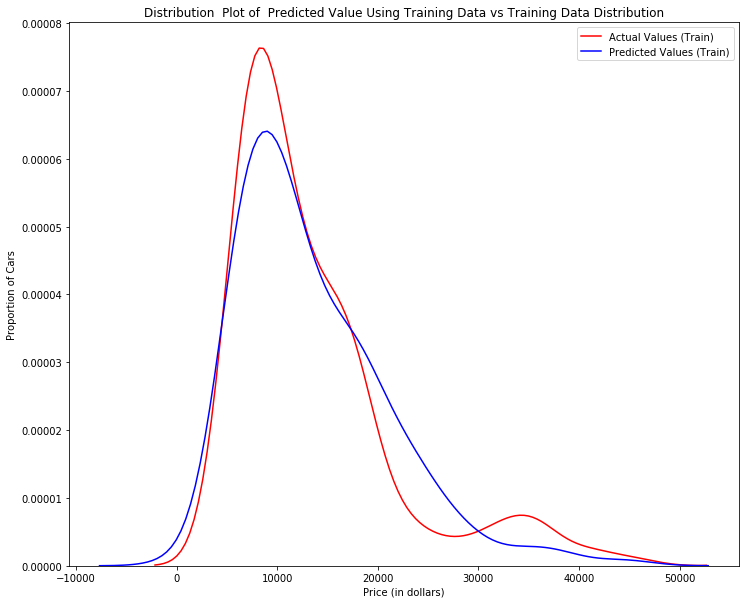

In [33]:
# Examining the distribution of the predicted values of the training data
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

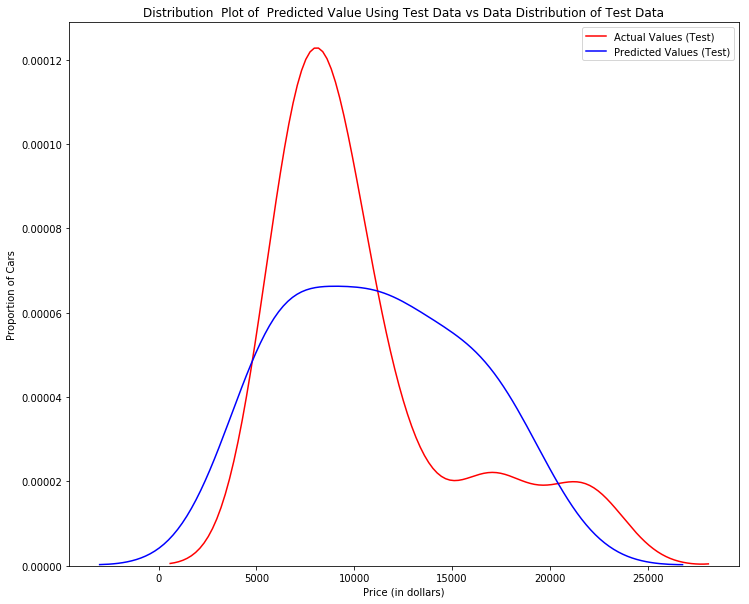

"\nComparing Figure 1 and Figure 2; it is evident the distribution of the test data in Figure 1 is much better at fitting the \ndata. This difference in Figure 2 is apparent where the ranges are from 5000 to 15 000. This is where the distribution \nshape is exceptionally different. Let's see if polynomial regression also exhibits a drop in the prediction accuracy \nwhen analysing the test dataset.\n"

In [35]:
# Plot of predicted value using the test data compared to the test data
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

'''
Comparing Figure 1 and Figure 2; it is evident the distribution of the test data in Figure 1 is much better at fitting the 
data. This difference in Figure 2 is apparent where the ranges are from 5000 to 15 000. This is where the distribution 
shape is exceptionally different. Let's see if polynomial regression also exhibits a drop in the prediction accuracy 
when analysing the test dataset.
'''

In [37]:
'''
OVERFITTING
This occurs when the model fits the noise, not the underlying process. Therefore when testing your model 
using the test-set, your model does not perform as well as it is modelling noise, not the underlying process 
that generated the relationship. 

Let's create a degree 5 polynomial model.
'''
from sklearn.preprocessing import PolynomialFeatures

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [39]:
# Performing a degree 5 polynomial transformation on the feature 'horse power'
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5, include_bias=True, interaction_only=False)

In [40]:
# Creating the regression model and training it
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
# Output of the model using predict 
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.77492727,  7308.09738048, 12213.83912148, 18893.06269972,
       19995.73316497])

In [42]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6728.77492727  7308.09738048 12213.83912148 18893.06269972]
True values: [ 6295. 10698. 13860. 13499.]


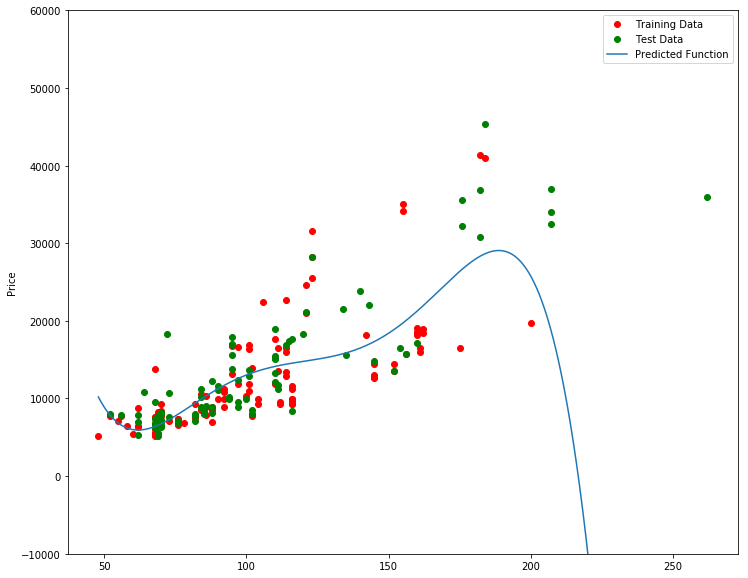

In [43]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

In [47]:
'''
Lower the R^2 worse the model. 
Negative R^2 is a sign of overfitting
'''
poly.score(x_train_pr, y_train)       # R^2 of the training data

0.5567716899817778

In [49]:

poly.score(x_test_pr, y_test)         # R^2 of the test data

-29.871838229908324

Text(3,0.75,'Maximum R^2 ')

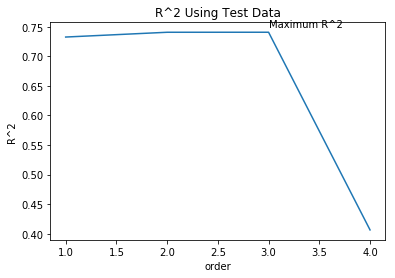

In [50]:
# Checking the variation of R^2 on the test data with different order polynomial
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

In [51]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

In [52]:
'''
Generating Interactive Plot
'''
# Experimenting with the different polynomial order and different amount of data
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

In [56]:
'''
Performing polynomial transformations with more than one feature. 
'''
pr1=PolynomialFeatures(degree=2)

In [57]:
# Transform the training and testing samples for the features 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg
x_train_pr1=pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

x_test_pr1=pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

In [59]:
 x_train_pr1.shape     # Checking the nbr of dimensions this new feature has 

(110, 15)

In [60]:
poly1=LinearRegression().fit(x_train_pr1,y_train)

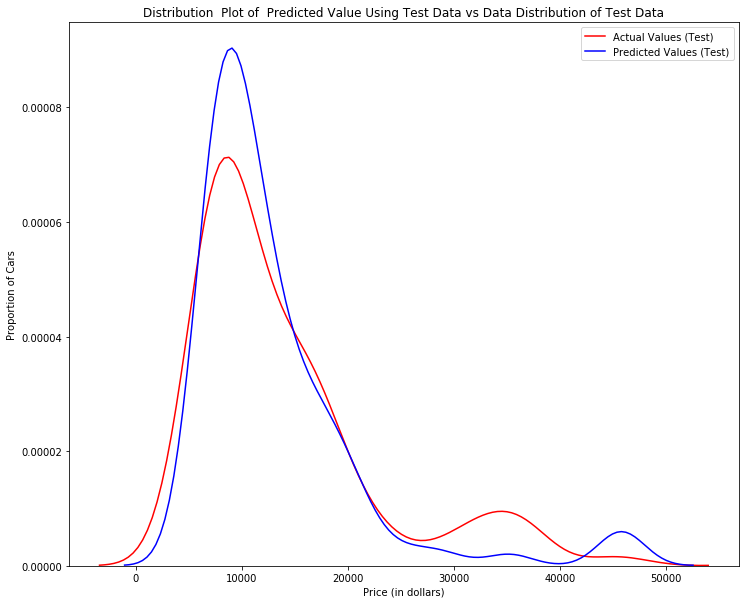

In [62]:
'''
The predicted value is higher than actual value for cars where the price  $ 10,000 range, conversely the 
predicted price is lower than the price cost in the $30,000 to $40,000 range. As such the model is not 
as accurate in these ranges .
'''

yhat_test1=poly1.predict(x_test_pr1)
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)


In [64]:
'''
PART 3: RIDGE REGRESSION

We introduce the parameter alpha. Let's see how this changes the model.
Here our test data will be used as validateion data
'''

from sklearn.linear_model import Ridge

pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [65]:
RigeModel=Ridge(alpha=0.1)      #Creating the Ridge regression object and seting the regularization parameter to 0.1

In [66]:
RigeModel.fit(x_train_pr, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.029716e-16
  overwrite_a=True).T


Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [67]:
yhat = RigeModel.predict(x_test_pr)

In [68]:
# Comparing the first 5 predicted samples to our test set
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6567.83081933  9597.97151399 20836.22326843 19347.69543463]
test set : [ 6295. 10698. 13860. 13499.]


In [69]:
# Finding alpha for which the test error is minimum

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
for alpha in Alpha:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    Rsqu_test.append(RigeModel.score(x_test_pr, y_test))       # Calculating R^2
    Rsqu_train.append(RigeModel.score(x_train_pr, y_train))

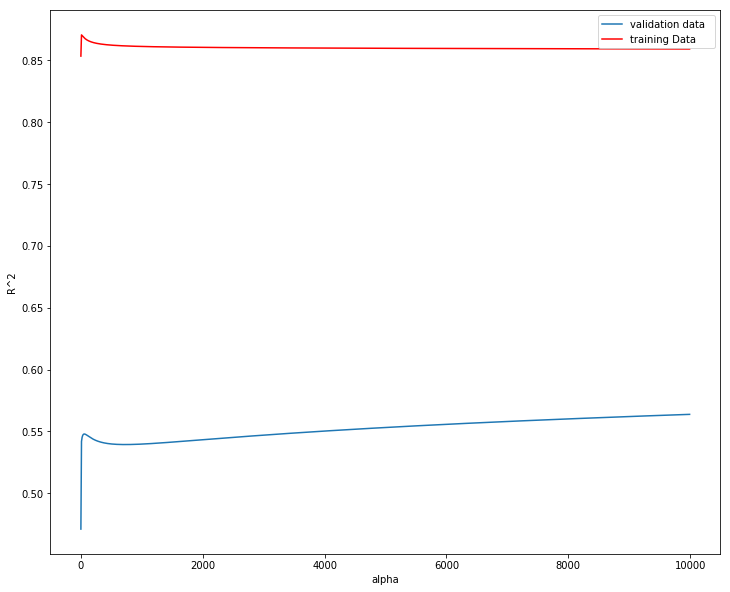

In [71]:
# Plotting R^2 for different alpha

'''
The red line in figure 6 represents the R^2 of the test data.
As Alpha increases the R^2 decreases.
Therefore as Alpha increases the model performs worse on the test data.

The blue line represents the R^2 on the validation data.
As the value for Alpha increases the R^2 increases and converges at a point
'''
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

In [73]:
'''
PART 4: GRID SEARCH

lfa is a hyperparameter, sklearn has the class GridSearchCV to make the process of finding the best hyperparameter simpler.
'''
from sklearn.model_selection import GridSearchCV

In [74]:
# Creating the dictionary of parameter values:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [77]:
RR=Ridge()         # Create a ridge region object
RR

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [76]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)       # Create a ridge grid search object

In [79]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)     # Fitting the model

Ridge(alpha=10000, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [82]:
# The object finds the best parameter values on the validation data. 
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [81]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.841164983103615

In [84]:
# Perform a grid search for the alpha parameter and the normalization parameter, then finding the best values of the parameters

parameters2= [{'alpha': [0.001,0.1,1, 10, 100, 1000,10000,100000,100000],'normalize':[True,False]} ]
Grid2 = GridSearchCV(Ridge(), parameters2,cv=4)
Grid2.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],y_data)
Grid2.best_estimator_

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)